In [86]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [88]:
df1 = pd.read_csv(r"D:\dataset 2024\used cars dataset\train-data.csv")

exploration and etl

In [91]:
df1.isnull().mean().round(4)

Unnamed: 0           0.0000
Name                 0.0000
Location             0.0000
Year                 0.0000
Kilometers_Driven    0.0000
Fuel_Type            0.0000
Transmission         0.0000
Owner_Type           0.0000
Mileage              0.0003
Engine               0.0060
Power                0.0060
Seats                0.0070
New_Price            0.8631
Price                0.0000
dtype: float64

In [93]:
df1.drop(["Unnamed: 0","New_Price"],axis=1,inplace= True)

In [95]:
df1.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [97]:
df1.describe(include = "O")

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,6019,6019,6019,6019,6019,6017,5983,5983
unique,1876,11,5,2,4,442,146,372
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp
freq,49,790,3205,4299,4929,172,606,235


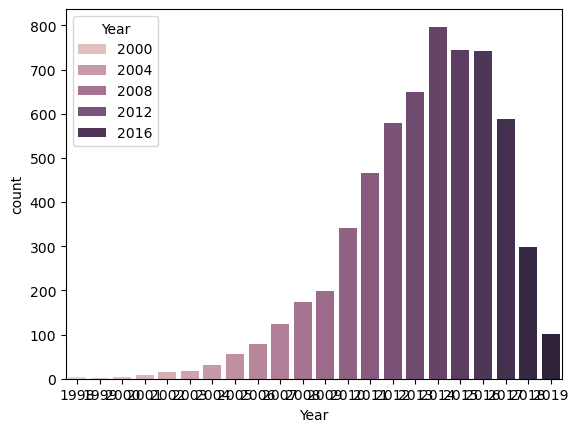

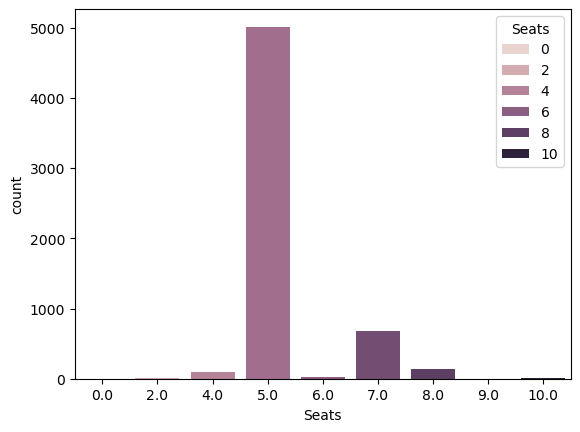

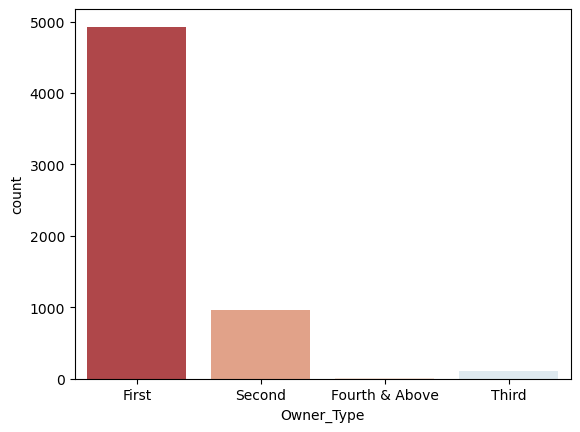

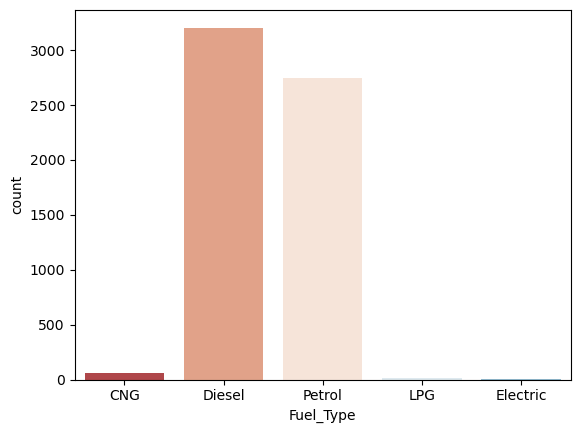

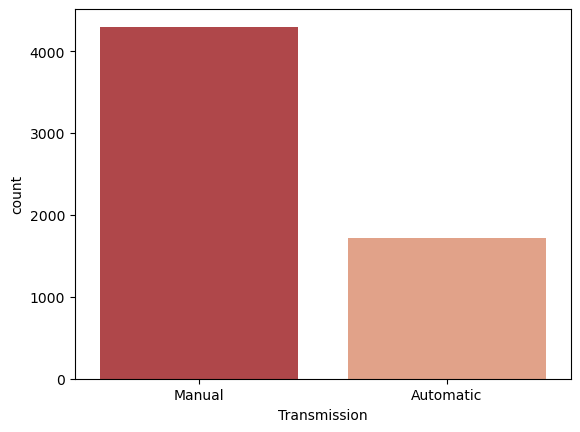

In [99]:
for col in ["Year","Seats","Owner_Type","Fuel_Type","Transmission"]:
    df1[col] = df1[col].astype("object")
    sns.countplot(data = df1,x = col , hue = col)
    sns.set_palette("RdBu")
    plt.show()

In [100]:
df1.dtypes

Name                  object
Location              object
Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                 object
Price                float64
dtype: object

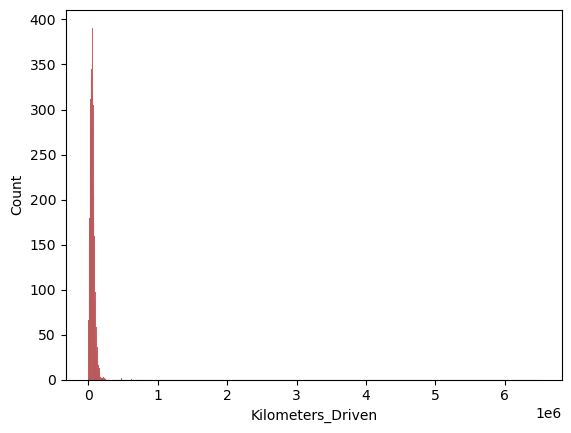

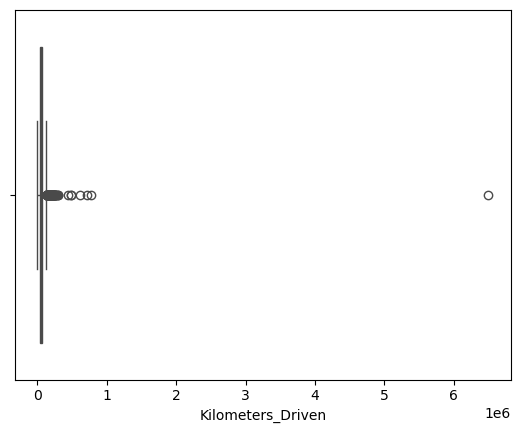

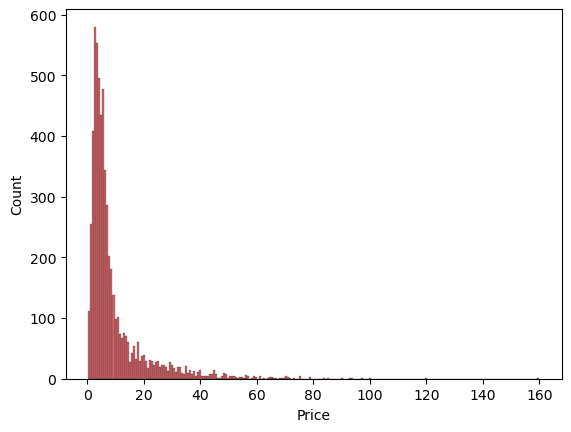

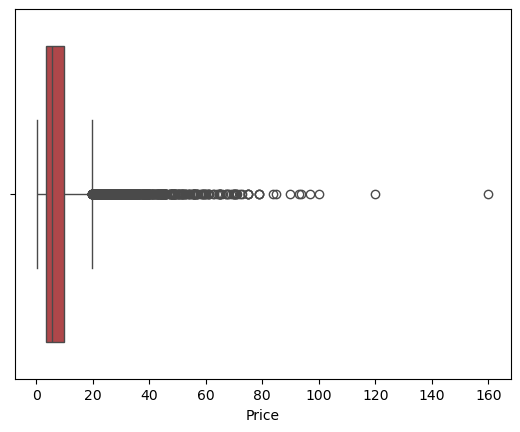

In [101]:
for col in ["Kilometers_Driven","Price"]:
    sns.histplot(data=df1,x=col)
    plt.show()
    sns.boxplot(data= df1,x=col)
    plt.show()

<Axes: ylabel='Price_usd'>

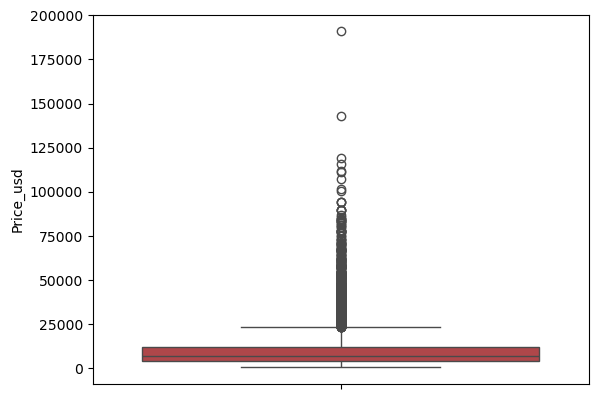

In [102]:
df1["Price_usd"] = df1["Price"] * 1193.15
sns.boxplot(df1["Price_usd"])

In [103]:
df1.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_usd
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,2088.0125
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,14914.3750
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,5369.1750
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,7158.9000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,21166.4810


In [104]:
 df1["Brand"] = df1["Name"].apply(lambda x: x.split()[0])
df1.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_usd,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,2088.0125,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,14914.3750,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,5369.1750,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,7158.9000,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,21166.4810,Audi


In [105]:
df1["Brand"].nunique()

31

In [106]:
df1["Brand"].value_counts()

Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

In [107]:
df1["Model"] = df1["Name"].apply(lambda x: x.split()[1])

In [108]:
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_usd,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,2088.0125,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,14914.3750,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,5369.1750,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,7158.9000,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,21166.4810,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,5667.4625,Maruti,Swift
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,4772.6000,Hyundai,Xcent
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,3460.1350,Mahindra,Xylo
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,3161.8475,Maruti,Wagon


In [111]:
df1["Model"].nunique()

212

In [112]:
df1["Model"].value_counts()

Model
Swift         353
City          270
i20           247
Verna         170
Innova        164
             ... 
Beetle          1
Petra           1
Tiguan          1
Countryman      1
F               1
Name: count, Length: 212, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

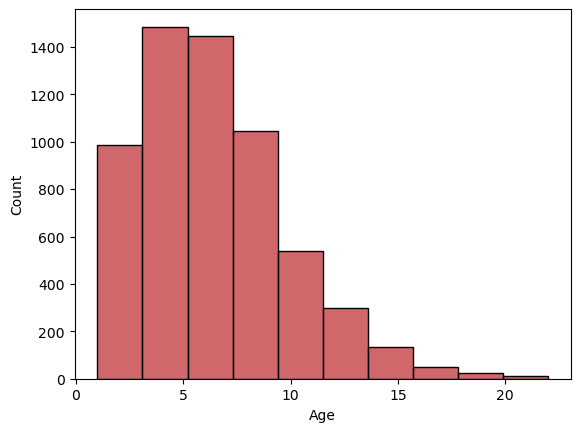

In [113]:
df1["Age"] = 2020 -df1["Year"]
sns.histplot(df1["Age"],bins=10)

In [114]:
def mileage_convert(x):
    if type(x) ==str:
        if x.split()[-1] == "km/kg":
            return float(x.split()[0]) * 1.40
        elif x.split()[-1] =="kmpl":
            return float(x.split()[0])
    else:
        return np.nan

df1["Mileage (km/l)"] = df1["Mileage"].apply(mileage_convert)

In [115]:
df1.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_usd,Brand,Model,Age,Mileage (km/l)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,2088.0125,Maruti,Wagon,10,37.24
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,14914.3750,Hyundai,Creta,5,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,5369.1750,Honda,Jazz,9,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,7158.9000,Maruti,Ertiga,8,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,21166.4810,Audi,A4,7,15.20


In [116]:
df1["Mileage"].isna().sum()

2

In [117]:
def engine_convert(x):
    if type(x) == str:
        if x.split()[-1] == "CC":
            return float(x.split()[0])
    else:
        return np.nan

df1["Engine_Capacity"] = df1["Engine"].apply(engine_convert)

In [118]:
df1.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_usd,Brand,Model,Age,Mileage (km/l),Engine_Capacity
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,2088.0125,Maruti,Wagon,10,37.24,998.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,14914.3750,Hyundai,Creta,5,19.67,1582.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,5369.1750,Honda,Jazz,9,18.20,1199.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,7158.9000,Maruti,Ertiga,8,20.77,1248.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,21166.4810,Audi,A4,7,15.20,1968.0


In [119]:
df1.dtypes

Name                  object
Location              object
Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                 object
Price                float64
Price_usd            float64
Brand                 object
Model                 object
Age                   object
Mileage (km/l)       float64
Engine_Capacity      float64
dtype: object

In [120]:
df1["Power"].head(5)

0    58.16 bhp
1    126.2 bhp
2     88.7 bhp
3    88.76 bhp
4    140.8 bhp
Name: Power, dtype: object

In [121]:
def power_convert(x):
    if type(x) == str:
        if x.split()[-1] == "bhp":
            return x.split()[0]
    else:
        return np.nan

df1["Power_Capacity"] = df1["Power"].apply(power_convert)

In [122]:
df1["Power_Capacity"] = pd.to_numeric(df1["Power_Capacity"],errors = "coerce")

In [123]:
df1["Power_Capacity"]

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: Power_Capacity, Length: 6019, dtype: float64

In [124]:
df1.drop(df1[df1["Kilometers_Driven"] == df1["Kilometers_Driven"].max()].index,axis=0,inplace=True)
df1.drop(df1[df1["Seats"] == df1["Seats"].min()].index,axis=0,inplace=True)


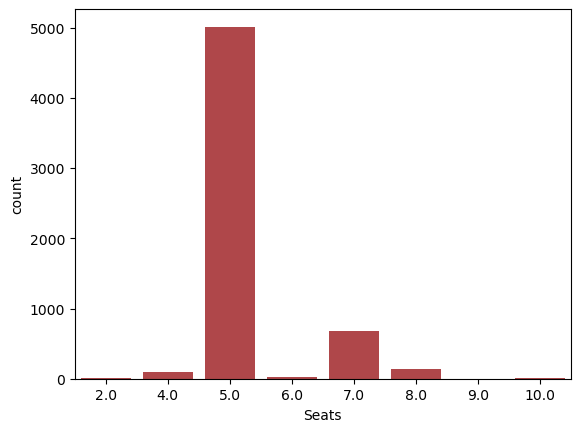

In [125]:
sns.countplot(data = df1,x = "Seats")
plt.show()

<Axes: xlabel='Kilometers_Driven'>

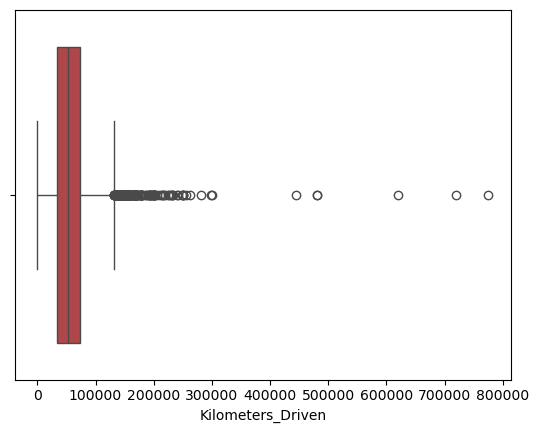

In [126]:
sns.boxplot(data= df1,x = "Kilometers_Driven")

In [127]:
df1.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_usd,Brand,Model,Age,Mileage (km/l),Engine_Capacity,Power_Capacity
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,2088.0125,Maruti,Wagon,10,37.24,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,14914.3750,Hyundai,Creta,5,19.67,1582.0,126.20


missing values and outliers


In [130]:
df2 = df1.drop(["Name","Year","Mileage","Engine","Power","Price"],axis=1)

In [135]:
df2.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price_usd,Brand,Model,Age,Mileage (km/l),Engine_Capacity,Power_Capacity
0,Mumbai,72000,CNG,Manual,First,5.0,2088.0125,Maruti,Wagon,10,37.24,998.0,58.16
1,Pune,41000,Diesel,Manual,First,5.0,14914.3750,Hyundai,Creta,5,19.67,1582.0,126.20
2,Chennai,46000,Petrol,Manual,First,5.0,5369.1750,Honda,Jazz,9,18.20,1199.0,88.70
3,Chennai,87000,Diesel,Manual,First,7.0,7158.9000,Maruti,Ertiga,8,20.77,1248.0,88.76
4,Coimbatore,40670,Diesel,Automatic,Second,5.0,21166.4810,Audi,A4,7,15.20,1968.0,140.80


In [141]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6017 non-null   object 
 1   Kilometers_Driven  6017 non-null   int64  
 2   Fuel_Type          6017 non-null   object 
 3   Transmission       6017 non-null   object 
 4   Owner_Type         6017 non-null   object 
 5   Seats              5975 non-null   object 
 6   Price_usd          6017 non-null   float64
 7   Brand              6017 non-null   object 
 8   Model              6017 non-null   object 
 9   Age                6017 non-null   object 
 10  Mileage (km/l)     6015 non-null   float64
 11  Engine_Capacity    5981 non-null   float64
 12  Power_Capacity     5875 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 658.1+ KB


In [142]:
df2["Age"] =df2["Age"].astype("int")

In [148]:
num_cols = df2.select_dtypes(exclude = "object").columns

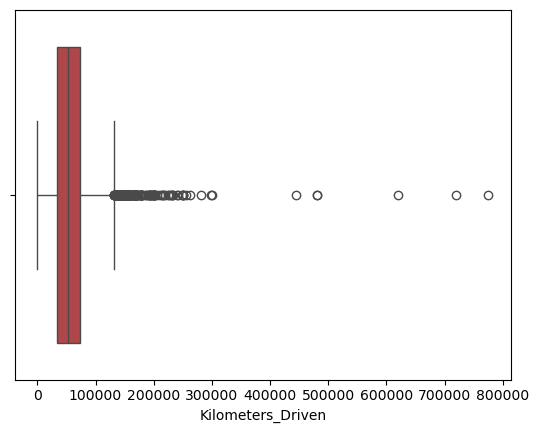

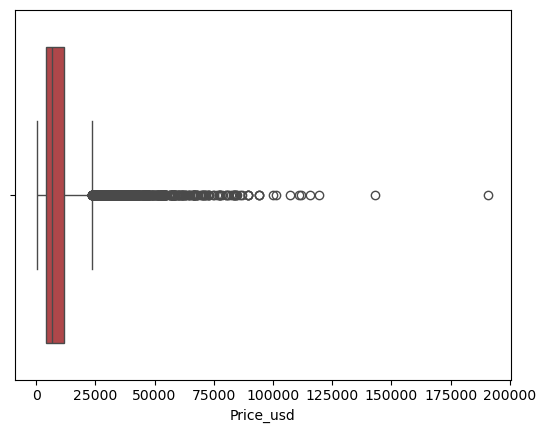

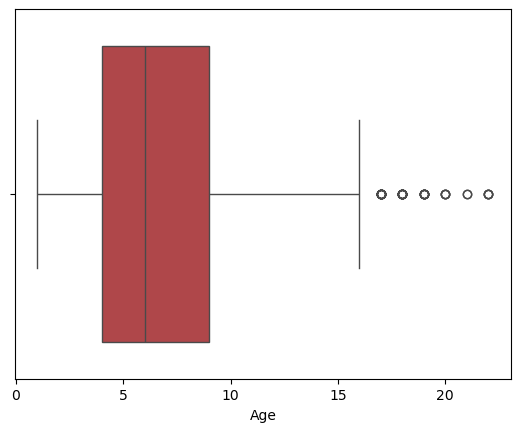

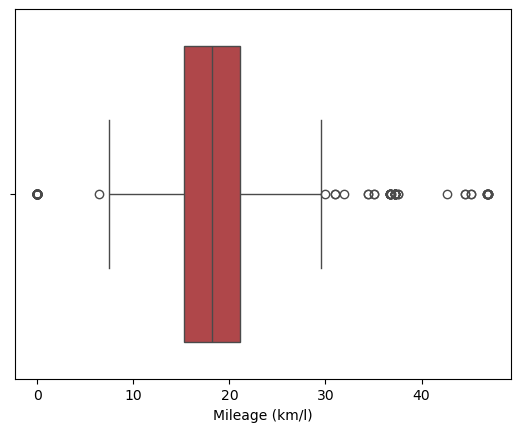

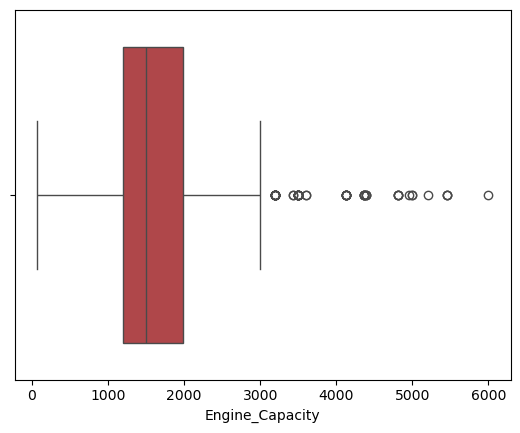

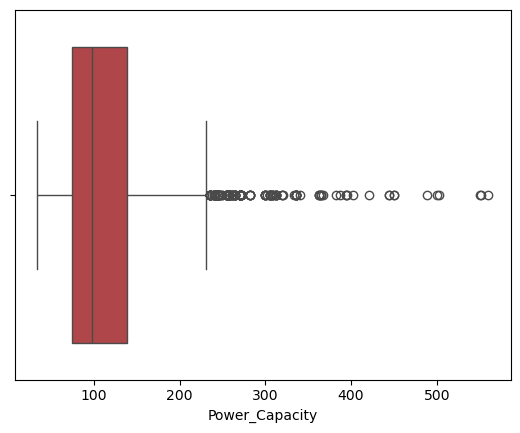

In [153]:
for col in num_cols:
    sns.boxplot(data = df2,x=col)
    plt.show()

In [157]:
def outlier_handling(x, p1= 0.25,p2 = 0.75):
    q1 = x.quantile(p1)
    q3 = x.quantile(p2)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr 
    return x[(x > min_limit) & (x < max_limit)] 

In [159]:
for col in ["Engine_Capacity","Power_Capacity","Mileage (km/l)","Kilometers_Driven","Age"]:
    df2[col] = outlier_handling(df2[col])
    

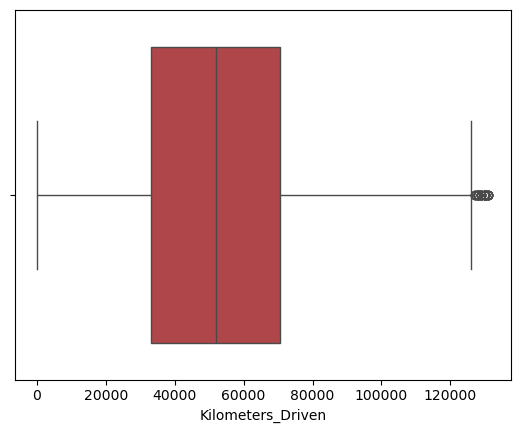

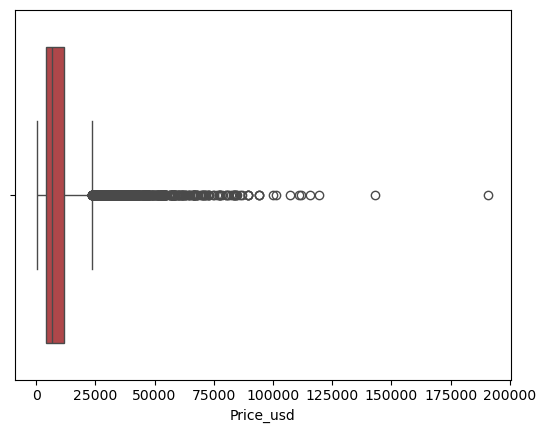

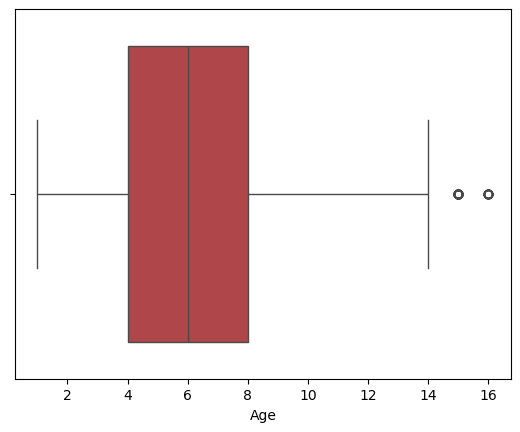

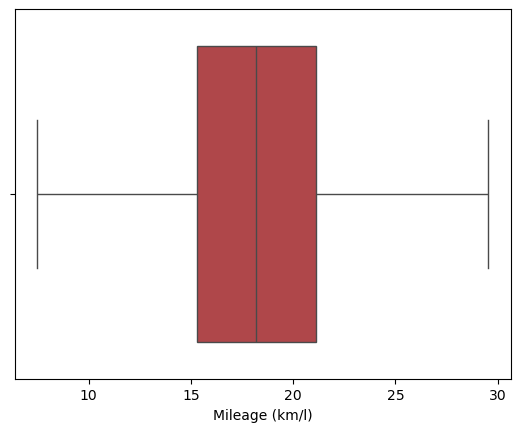

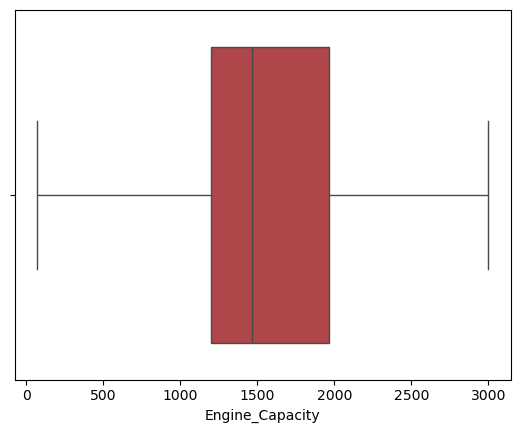

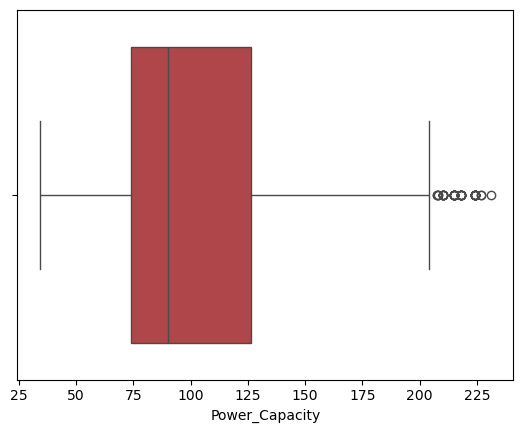

In [162]:
for col in num_cols:
    sns.boxplot(data = df2,x=col)
    plt.show()

In [164]:
num_cols = df2.select_dtypes(exclude = "object").columns
cat_cols = df2.select_dtypes(include = "object").columns

In [166]:
cat_cols

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand',
       'Model'],
      dtype='object')

In [169]:
num_cols

Index(['Kilometers_Driven', 'Price_usd', 'Age', 'Mileage (km/l)',
       'Engine_Capacity', 'Power_Capacity'],
      dtype='object')

data splitting


In [172]:
x = df2.drop(["Price_usd"],axis=1)
y = df2["Price_usd"]

In [173]:
num_cols=  x.select_dtypes(exclude = "object").columns.tolist()


In [174]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 0)

In [176]:
nominal_cols = ["Location","Fuel_Type","Transmission","Brand"]
ordinal_cols = ["Seats","Owner_Type"]

In [179]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline 

num_pipeline = Pipeline([("imputer",SimpleImputer(strategy = "median")),
                         (  )
                         ("scaler",StandardScaler())
                        ])

ordinal_pipeline = Pipeline([("imputer", SimpleImputer(strategy = "most_frequent")),
                             ("encoder",OrdinalEncoder())
                            ])
nominal_pipeline = Pipeline([("imputer",SimpleImputer(strategy = "most_frequent")),
                         ("encoder",OneHotEncoder(drop = "first",sparse_output = False,handle_unknown = "ignore"))
                        ])

preprocessor = ColumnTransformer([
    ("num_pipeline",num_pipeline,num_cols),
    ("ordinal_pipeline",ordinal_pipeline,ordinal_cols),
     ("nominal_pipeline",nominal_pipeline,nominal_cols)
])



<>:7: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:7: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
C:\Users\abd0l\AppData\Local\Temp\ipykernel_7852\515810259.py:7: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  (  )


TypeError: 'tuple' object is not callable

In [ ]:
x_train_prep = preprocessor .fit_transform(x_train)
x_test_prep = preprocessor.transform(x_test)

In [233]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_prep, y_train)

LinearRegression()

In [235]:
from sklearn.metrics import r2_score,mean_squared_error 

y_pred = model.predict(x_test_prep)
score1 = r2_score(y_test,y_pred)
score2 =mean_squared_error(y_test,y_pred)



In [237]:
score1

0.9009873132055519

In [239]:
score2

0.07881164666527742

In [241]:
from sklearn.metrics import r2_score,mean_squared_error 
from sklearn.linear_model import Ridge
model = Ridge(alpha = 3)
model.fit(x_train_prep, y_train)
y_pred = model.predict(x_test_prep)
score1r = r2_score(y_test,y_pred)
score2r =mean_squared_error(y_test,y_pred)


In [243]:
score1r

0.8984270129538933

In [245]:
score2r

0.08084958226043655

polynomial feature

In [248]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures


num_pipeline = Pipeline([("imputer",SimpleImputer(strategy = "median")),
                         ("poly", PolynomialFeatures(degree = 3)),
                         ("scaler",StandardScaler())
                        ])

ordinal_pipeline = Pipeline([("imputer", SimpleImputer(strategy = "most_frequent")),
                             ("encoder",OrdinalEncoder())
                            ])
nominal_pipeline = Pipeline([("imputer",SimpleImputer(strategy = "most_frequent")),
                         ("encoder",OneHotEncoder(drop = "first",sparse_output = False,handle_unknown = "ignore"))
                        ])

preprocessor = ColumnTransformer([
    ("num_pipeline",num_pipeline,num_cols),
    ("ordinal_pipeline",ordinal_pipeline,ordinal_cols),
     ("nominal_pipeline",nominal_pipeline,nominal_cols)
])



In [250]:
x_train_prep = preprocessor .fit_transform(x_train)
x_test_prep = preprocessor.transform(x_test)

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [252]:
model = LinearRegression()
model.fit(x_train_prep, y_train)
y_pred = model.predict(x_test_prep)
score1p = r2_score(y_test,y_pred)
score2p =mean_squared_error(y_test,y_pred)

In [254]:
score1p.round(4)

0.8958

In [256]:
score2p

0.08295020967790227

In [258]:
model = Ridge(alpha = 25)
model.fit(x_train_prep, y_train)
y_pred = model.predict(x_test_prep)
score1pr = r2_score(y_test,y_pred)
train_score = model.score(x_train_prep ,y_train)  # to compare with prediction to find overfitted or underfitted or not
score2pr=mean_squared_error(y_test,y_pred)

In [260]:
score1pr.round(4)

0.8841

In [262]:
train_score

0.898378925939588

log y value and repeat the process

In [265]:
y = np.log(df2['Price_usd'])

In [267]:
df2["Price_usd"].unique()

array([ 2088.0125, 14914.375 ,  5369.175 , ...,  2708.4505, 20951.714 ,
        8865.1045])

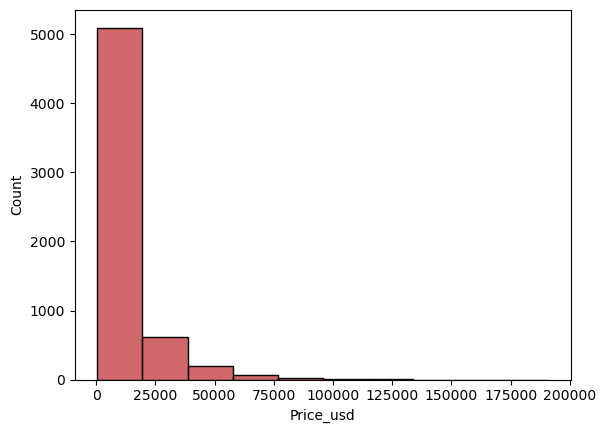

In [269]:
import seaborn as sns
sns.histplot(data = df2 , x = "Price_usd",bins=10)
plt.show()

In [271]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 0)

In [273]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures


num_pipeline = Pipeline([("imputer",SimpleImputer(strategy = "median")),
                         ("poly", PolynomialFeatures(degree = 5)),
                         ("scaler",StandardScaler())
                        ])

ordinal_pipeline = Pipeline([("imputer", SimpleImputer(strategy = "most_frequent")),
                             ("encoder",OrdinalEncoder())
                            ])
nominal_pipeline = Pipeline([("imputer",SimpleImputer(strategy = "most_frequent")),
                         ("encoder",OneHotEncoder(drop = "first",sparse_output = False,handle_unknown = "ignore"))
                        ])

preprocessor = ColumnTransformer([
    ("num_pipeline",num_pipeline,num_cols),
    ("ordinal_pipeline",ordinal_pipeline,ordinal_cols),
     ("nominal_pipeline",nominal_pipeline,nominal_cols)
])

x_train_prep = preprocessor .fit_transform(x_train)
x_test_prep = preprocessor.transform(x_test)


C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [217]:
model = Ridge(alpha = 20)
model.fit(x_train_prep, y_train)
y_pred = model.predict(x_test_prep)
score1pr = r2_score(y_test,y_pred)
train_score = model.score(x_train_prep ,y_train)  # to compare with prediction to find overfitted or underfitted or not
score2pr=mean_squared_error(y_test,y_pred)

In [219]:
score1pr

0.8898518001495858

In [221]:
train_score

0.9055498132896151